<a href="https://colab.research.google.com/github/bartlomiejandruchow/AI/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMDb dataset

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import numpy as np
import keras
from keras import layers

#print(train_data[0])
print(train_data.shape)
#train_labels[0]

max([max(sequence) for sequence in train_data])

word_index = imdb.get_word_index()
reverse_word_index = dict([(key,value) for (value, key) in word_index.items()])
decoded_review = " ".join(reverse_word_index.get(i-3,"?") for i in train_data[0])


def multi_hot_sequences(sequences, num_classes):
  results = np.zeros((len(sequences),num_classes))
  for i, sequence in enumerate(sequences):
    results[i][sequence] = 1.0
  return results

x_train = multi_hot_sequences(train_data, num_classes=10000)
x_test = multi_hot_sequences(test_data, num_classes=10000)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

results = model.evaluate(x_test, y_test)
print(results)


In [ ]:
import matplotlib.pyplot as plt

plt.clf

history_dict = history.history

acc = history_dict['loss']
val_acc = history_dict['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,"r--")
plt.plot(epochs, val_acc,"b--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.xticks(epochs)
plt.show()




In [21]:
# Housing Price
from keras.datasets import california_housing
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = california_housing.load_data(version = "small")



In [22]:
def get_model():
  model = keras.Sequential(
      [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
      ]
  )

  model.compile(optimizer = 'adam',
                loss = 'mean_squared_error',
                metrics = ['mean_absolute_error'],
                )
  return model
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

x_train = (train_data - mean) / std
x_test = (test_data - mean) / std

y_train = train_labels / 100000
y_test = test_labels / 100000




In [30]:
# |-----|+++++|+++++|+++++|
# |+++++|-----|+++++|+++++|
# |+++++|+++++|-----|+++++|
# |+++++|+++++|+++++|-----|

# 0 : 0 , 120 :
# 1 : 120 , 240 :
# 2 : 240 , 360 :
# 3 : 360 , 480 :

k = 4
num_epochs = 200 #50
all_scores = []
all_mea_histories = []

num_val_samples = len(train_data) // k

for i in range(k):
  fold_x_val = x_train[i * num_val_samples : (i+1) * num_val_samples]
  fold_y_val = y_train[i * num_val_samples : (i+1) * num_val_samples]

  fold_x_train = np.concatenate([x_train[:i*num_val_samples], x_train[(i+1)*num_val_samples:]], axis=0,)
  fold_y_train = np.concatenate([y_train[:i*num_val_samples], y_train[(i+1)*num_val_samples:]], axis=0,)

  model = get_model()

  history = model.fit(
      fold_x_train,
      fold_y_train,
      validation_data = (fold_x_val, fold_y_val),
      epochs = num_epochs,
      batch_size = 16,
      verbose = 0
  )
  #scores = model.evaluate(fold_x_val, fold_y_val, verbose = 0)
  #val_loss, val_mae = scores
  #all_scores.append(val_mae)

  mea_history = history.history['val_mean_absolute_error']
  all_mea_histories.append(mea_history)

  #print(f" {i} : {i*num_val_samples} , {(i+1)*num_val_samples} :")



[[0.8537886142730713, 0.6487018465995789, 0.5455120205879211, 0.48398083448410034, 0.46532678604125977, 0.44411537051200867, 0.41710618138313293, 0.41286176443099976, 0.38357388973236084, 0.3877044916152954, 0.3574110269546509, 0.3517940938472748, 0.3553820252418518, 0.34005457162857056, 0.34642472863197327, 0.328851580619812, 0.36796364188194275, 0.34995779395103455, 0.314776211977005, 0.32800590991973877, 0.31329452991485596, 0.3212110698223114, 0.3206912875175476, 0.3353062868118286, 0.31138312816619873, 0.31568723917007446, 0.3307236433029175, 0.33171191811561584, 0.31805604696273804, 0.32030507922172546, 0.3186672031879425, 0.3212399482727051, 0.32820233702659607, 0.31483760476112366, 0.3122429847717285, 0.3211509883403778, 0.3143060505390167, 0.3135847747325897, 0.3247801661491394, 0.3175499737262726, 0.3145793080329895, 0.311063289642334, 0.3190224766731262, 0.31287625432014465, 0.3191942274570465, 0.3163386285305023, 0.32407569885253906, 0.32261332869529724, 0.32971352338790894

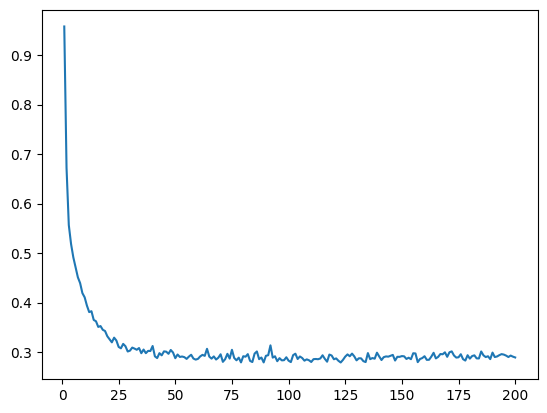

In [31]:
print(all_mea_histories)

average_mae_history = [np.mean([x[i] for x in all_mea_histories]) for i in range(num_epochs)]
epochs = range(1, len(average_mae_history)+1)

plt.plot(epochs, average_mae_history)